# Age Estimation 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/581 Projects/Project 7'


/content/drive/My Drive/581 Projects/Project 7


In [ ]:
import numpy as np
import os
from prepare_data_sgd import *

# Loading Data

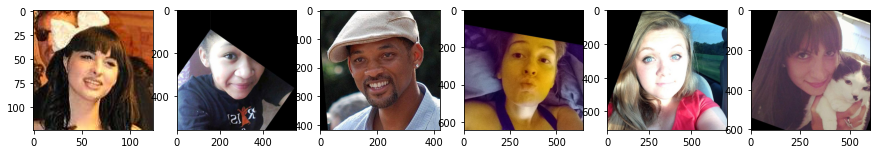

In [ ]:
base_dir = 'DATASET/'

age_train, features_train = prepare_data('train', base_dir)
age_val, features_val = prepare_data('val', base_dir)
_, features_test = prepare_data('test', base_dir)
show_data(base_dir)

# Implement Closed Form Solution
```
Arguments:
    age          -- numpy array, shape (n, )
    features     -- numpy array, shape (n, 2048)
Returns:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [ ]:
def closed_form_solution(age, features):
    # Preprocess
    H = features
    
    ones = np.ones(len(H))
    H = np.column_stack((ones,H))
   
    Y = age
  
    # Define parameter weights: 
    weights = None

    # calculate the closed form solution:
    weights = np.linalg.inv(H.T.dot(H)).dot(H.T).dot(Y)

    # separate the weights and bias
    bias    = weights[0]  # values from the first row 
    weights = weights[1:] # rest of the values

    return weights, bias
    

# Validate

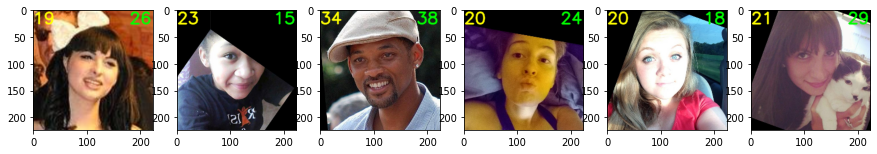

In [ ]:
w, b = closed_form_solution(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)




# Test and Generate results file

In [ ]:
prediction = test(w, b, features_test, 'cfs.txt')
print("Test results has saved to cfs.txt")
print(prediction[:10])



Test results has saved to cfs.txt
[[28.04639962]
 [60.90374508]
 [55.19594938]
 [23.35683533]
 [35.20122167]
 [34.36335499]
 [36.63257246]
 [44.11504383]
 [18.49147786]
 [57.60077161]]


# Implement Gradient descent
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [ ]:
def gradient_descent(age, feature):
    assert len(age) == len(feature)
    
    weights = np.random.randn(2048, 1)
    bias = np.random.randn(1, 1)
    
    # Learning rate
    lr = 10e-3
    
    epochs = 1000
 
    N = float(len(age))
  
    #biasVect = np.full((len(age)), bias)                    

    for e in range(epochs):
        # forward pass:
        yPredicted = np.matmul(feature, weights) + bias
      
        # calculate loss:
        yTrue = age.reshape((-1, 1))

        loss = abs(yTrue - (yPredicted)**2) / N
        
        # calculate gradient: 
        
        dw = -(2/feature.shape[0]) * np.dot(feature.T, yTrue-yPredicted)

        db =  -(2/feature.shape[0]) * np.sum(yTrue-yPredicted, axis=0)

        # update weights
        weights = weights - (lr * dw)
        
        bias = bias - (lr * db)
        
        if momentum:
            pass # You  can also consider the gradient descent with momentum
         
      
    return weights, bias

# Train and validate

Your validate score is: 59.379


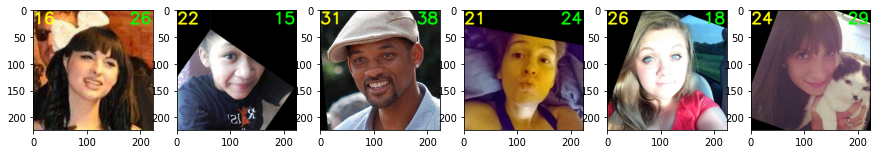

In [ ]:
w, b = gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

#  Test and Generate results file

In [ ]:
prediction = test(w, b, features_test, 'gd.txt')
print("Test results has saved to gd.txt")
print(prediction[:10])

Test results has saved to gd.txt
[[26.90319033]
 [75.25867487]
 [49.35435264]
 [21.76750043]
 [33.89916301]
 [30.99504186]
 [33.33782814]
 [42.05990609]
 [21.78379168]
 [54.04616831]]


# Implement Stochastic Gradient descent
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.
```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [ ]:
def stochastic_gradient_descent(age, feature):
    # check the inputs
    assert len(age) == len(feature)

    # Set the random seed
    np.random.seed(0)
    

    # Init weights and bias
    weights = np.random.rand(2048, 1)
   
    bias = np.random.rand(1, 1)
   

    # Learning rate
    lr = 10e-5

    # Batch size
    batch_size = 16
 
    # Number of mini-batches
    t = len(age) // batch_size

    epochSgd = 1000

    for e in range(epochSgd):
       
        n = np.random.permutation(len(feature))  
       
        for m in range(t):
            batch_feature = feature[n[m * batch_size : (m+1) * batch_size]]
           
            batch_age = age[n[m * batch_size : (m+1) * batch_size]]
           

            yPredicted = np.matmul(batch_feature, weights) + bias
            
            yTrue = batch_age.reshape((-1, 1))

           
            loss = abs(yTrue - (yPredicted)**2) / t
        
            # calculate gradient: 
            
            dw = -(2/batch_feature.shape[0]) * np.dot(batch_feature.T, yTrue-yPredicted)

            db =  -(2/batch_feature.shape[0]) * np.sum(yTrue-yPredicted, axis=0)

            # update weights
            weights = weights - (lr * dw)
            #biasVect = biasVect - (lr * db)
            bias = bias - (lr * db)
                
            if momentum:
                pass # You can also consider the gradient descent with momentum
        
        #print('=> epoch:', e + 1, '  Loss:', round(loss,4))
    return weights, bias

# Train and validate

Your validate score is: 57.527


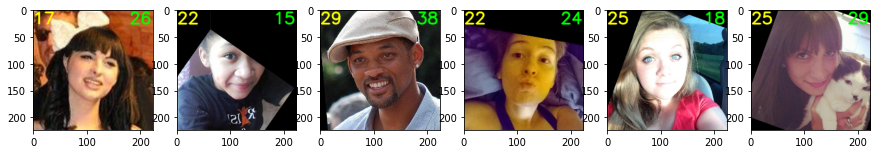

In [ ]:
w, b = stochastic_gradient_descent(age_train, features_train)
loss, pred = evaluate(w, b, age_val, features_val)
print("Your validate score is:", round(loss, 3))

# Test and Generate results file

In [ ]:
prediction = test(w, b, features_test, 'sgd.txt')
print("Test results has saved to sgd.txt")
print(prediction[:10])

Test results has saved to sgd.txt
[[26.84573926]
 [73.15426367]
 [48.10536172]
 [22.59590837]
 [34.95371411]
 [32.06081474]
 [34.97822788]
 [41.61840043]
 [21.96218352]
 [54.9911178 ]]
